1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [5]:
import math

# Given data
average_rate = 6.3
observed_number = 15

# Calculating the Poisson probability for 15 or more hurricanes
def poisson_pmf(lam, k):
    return math.exp(-lam) * (lam**k) / math.factorial(k)

# Calculatoing the probability for 15 or more hurricanes
probability_15_or_more = 1 - sum(poisson_pmf(average_rate, i) for i in range(observed_number))

# Given level of significance (alpha)
alpha = 0.022

# Comparing with the level of significance
if probability_15_or_more < alpha:
    print("The number of hurricanes in 2005 is significantly larger than the historic average.")
else:
    print("The number of hurricanes in 2005 is not significantly larger than the historic average.")

# Print the calculated probability
print(f"Probability of observing 15 or more hurricanes: {probability_15_or_more:.5f}")


The number of hurricanes in 2005 is significantly larger than the historic average.
Probability of observing 15 or more hurricanes: 0.00222


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Input data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Calculate the differences between pre and post
differences = post - pre

# Calculate the mean and standard deviation of the differences
xbar = np.mean(differences)
sigma = np.std(differences, ddof=1)

# Set the null hypothesis values
mu = 0  # Assuming no change

# Calculate the test statistics (T score)
n = len(differences)
T = (xbar - mu) / (sigma / np.sqrt(n))
print("T =", T)

# Calculate the p-value (double-sided)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

significant = pvalue < 0.05
print(f"Is the result statistically significant? {'Yes' if significant else 'No'}")


T = 6.4346880142560465
p-value = 1.9998797227163545
Is the result statistically significant? No


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

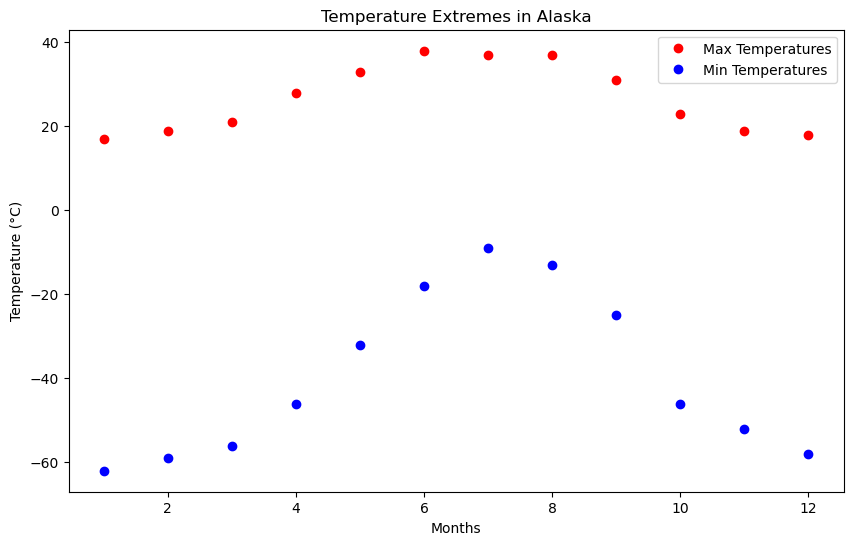

Fitted Max Temperature Parameters: [10.58169954  0.59227424  3.87225529 27.94963534]
Fitted Min Temperature Parameters: [ 25.14961978   0.60132102  -2.71842327 -36.71256224]


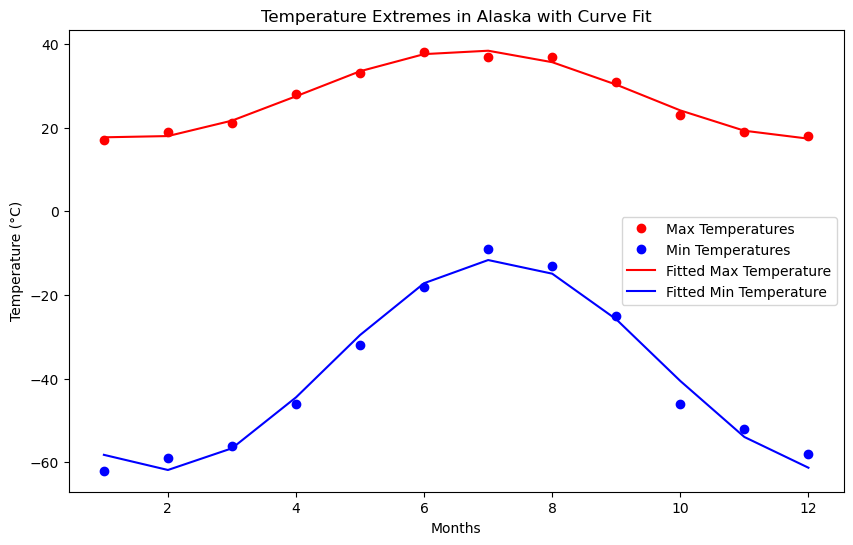

After inspecting the plot the fit looks reasonable

Phase Difference (Max - Min): 6.590678558415606
The time offset for min and max temperatures is not similar within the fit accuracy.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Given data
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plot the temperatures
months = np.arange(1, 13)
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'ro', label='Max Temperatures')
plt.plot(months, min_temps, 'bo', label='Min Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()

# Sine function for curve fitting
def temp_func(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Initial guess for parameters
initial_guess = (20, 0.5, 0, -20)

# Fit the function to the data
params_max, _ = curve_fit(temp_func, months, max_temps, p0=initial_guess)
params_min, _ = curve_fit(temp_func, months, min_temps, p0=initial_guess)

print("Fitted Max Temperature Parameters:", params_max)
print("Fitted Min Temperature Parameters:", params_min)

# Plot the result with the fitted curves
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'ro', label='Max Temperatures')
plt.plot(months, min_temps, 'bo', label='Min Temperatures')

# Plot the fitted curves
plt.plot(months, temp_func(months, *params_max), 'r-', label='Fitted Max Temperature')
plt.plot(months, temp_func(months, *params_min), 'b-', label='Fitted Min Temperature')

plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska with Curve Fit')
plt.legend()
plt.show()

print("After inspecting the plot the fit looks reasonable\n")

# Compare the time offset (phase) between the fitted max and min temperatures
phase_diff = params_max[2] - params_min[2]
print("Phase Difference (Max - Min):", phase_diff)

#tolerance level for fit accuracy
tolerance = 0.1 

# Checking if the phase difference is within the tolerance
if abs(phase_diff) < tolerance:
    print("The time offset for min and max temperatures is similar within the fit accuracy.")
else:
    print("The time offset for min and max temperatures is not similar within the fit accuracy.")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

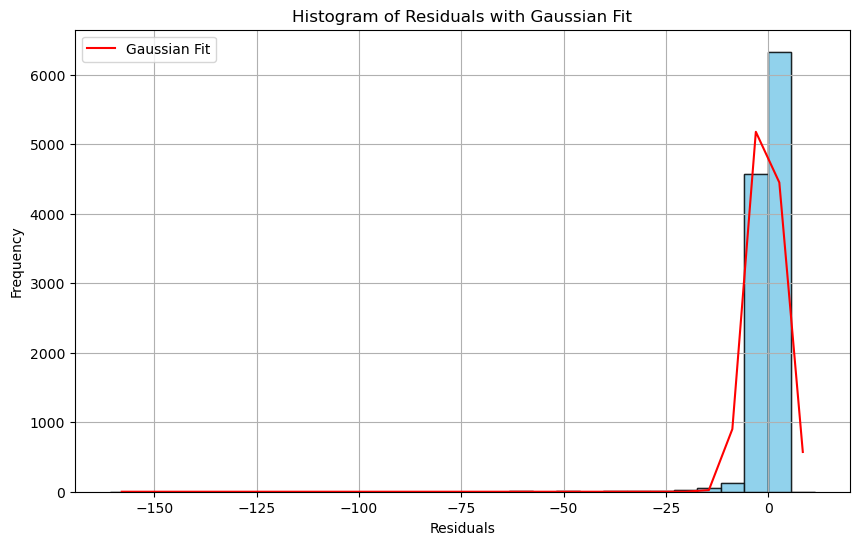

Fitted Mean (mu): -0.6164773541075758
Fitted Standard Deviation (sigma): 4.163517709439674
Chi-square statistic: 1035061362945.5973
Degrees of freedom: 28
p-value: 0.0
The fit function is not appropriate to describe the data.


In [9]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

# Loading the residuals data
with open('data/residuals_261.pkl', 'rb') as f:
    residuals = pickle.load(f)

# Creating a DataFrame from the loaded data
df = pd.DataFrame(residuals.tolist(), columns=['residuals', 'distances'])

# Create a histogram for the "residuals" feature
plt.figure(figsize=(10, 6))
bin_counts, bin_edges, _ = plt.hist(df['residuals'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Fit the Gaussian model to the histogram using scipy.stats.norm
mu, sigma = norm.fit(df['residuals'])

# Plot the histogram
plt.hist(df['residuals'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Plot the fitted Gaussian curve
pdf_values = norm.pdf(bin_centers, mu, sigma)
plt.plot(bin_centers, pdf_values * len(df['residuals']) * np.diff(bin_edges), color='red', label='Gaussian Fit')

# Plotting details
plt.title('Histogram of Residuals with Gaussian Fit')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Display the fitted parameters
print("Fitted Mean (mu):", mu)
print("Fitted Standard Deviation (sigma):", sigma)

# Calculating the expected counts using the fitted Gaussian function
expected_counts = pdf_values * len(df['residuals']) * np.diff(bin_edges)


epsilon = 1e-10 #to avoid divivion by zero
expected_counts += epsilon

# Calculating chi-square
chi_squared = np.sum((bin_counts - expected_counts)**2 / expected_counts)

# degrees of freedom
degrees_of_freedom = len(bin_counts) - 2 
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

print("Chi-square statistic:", chi_squared)
print("Degrees of freedom:", degrees_of_freedom)
print("p-value:", p_value)

if p_value < 0.05:
    print("The fit function is not appropriate to describe the data.")
else:
    print("The fit function is a reasonable description of the data.")


In [11]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt


--2024-01-18 23:11:15--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2024-01-18 23:11:16--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02afd631f8680209cc1cb49899.dl.dropboxusercontent.com/cd/0/inline/CLl8CICRQLKWC2BWK71fsYVotJ5xfEryuJoKToKKGMq_CSNVOtRkbLlxjlDxeHIrS_KGDA8lXNT6d19uiRrorTtT-9n_k0GJtJM80G7rIMx1cCe9v6B2C3tdMDEU3NdthzQ/file# [following]
--2024-01-18 23:11:16--  https://uc02afd631f8680209cc1cb49899.dl.dropboxusercontent.com/cd/0/inline/CLl8CICRQLKWC2BWK71fsYVotJ5xfEryuJoKToKKGMq_CSNVOt

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

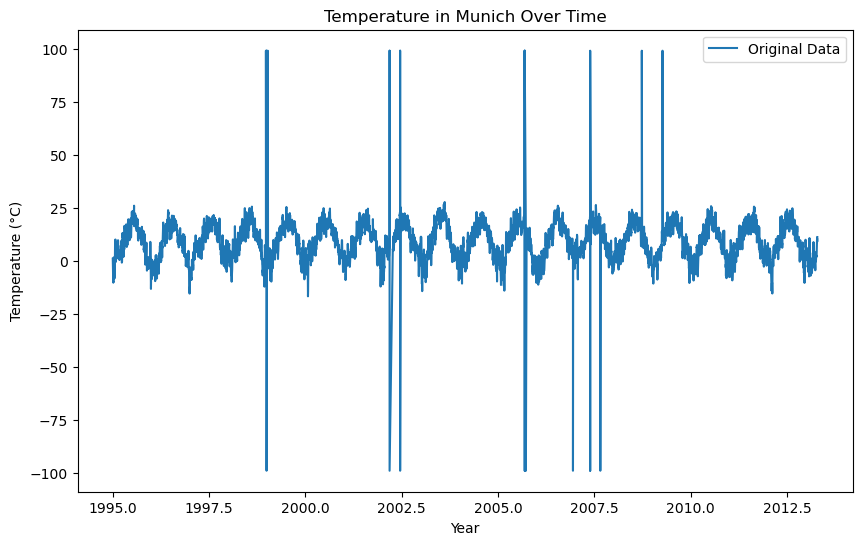

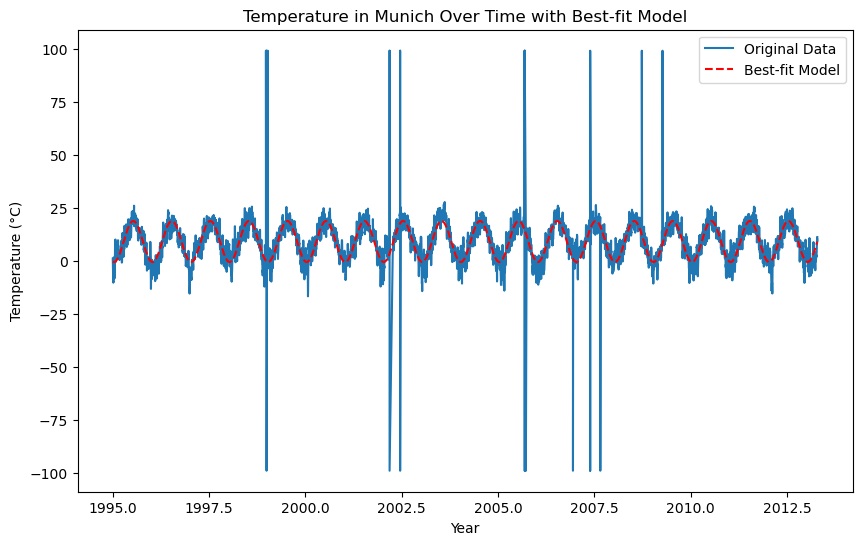

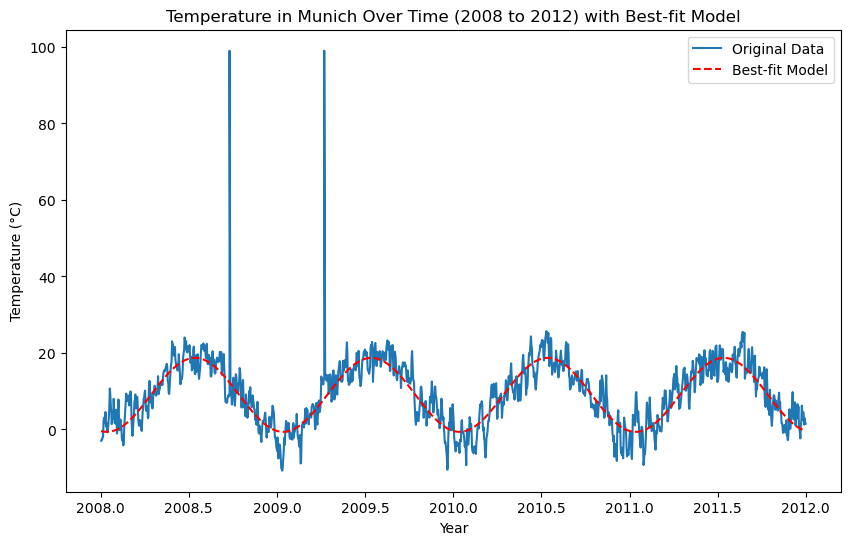

Best-fit values:
a: -9.671 ± 0.176
b: 12.343 ± 0.018
c: 9.053 ± 0.125

Overall Average Temperature in Munich: 8.942 °C

Typical Daily Average Values:
Coldest Time of Year: -0.619 °C
Hottest Time of Year: 18.724 °C

Period of the Cosine Function: 0.16 years
Frequency of the Cosine Function: 6.28 cycles per year
p-value: 0.634 , additional parameter necessary: NO


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Loading the data
data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')

# Separating dates and temperatures
years = data[:, 0]
temperatures = data[:, 1]

# Step 3: Plot the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(years, temperatures, label='Original Data')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich Over Time')
plt.legend()
plt.show()

def model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# fitting the model to the data
params, covariance = curve_fit(model, years, temperatures)
a_fit, b_fit, c_fit = params

# plotting the data and the best-fit model
plt.figure(figsize=(10, 6))
plt.plot(years, temperatures, label='Original Data')
plt.plot(years, model(years, a_fit, b_fit, c_fit), label='Best-fit Model', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich Over Time with Best-fit Model')
plt.legend()
plt.show()

# Step 7: Plot in the Range 2008 to 2012
start_year = 2008
end_year = 2012
mask = (years >= start_year) & (years <= end_year)

plt.figure(figsize=(10, 6))
plt.plot(years[mask], temperatures[mask], label='Original Data')
plt.plot(years[mask], model(years[mask], a_fit, b_fit, c_fit), label='Best-fit Model', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich Over Time (2008 to 2012) with Best-fit Model')
plt.legend()
plt.show()

# the best-fit values of the parameters and their uncertainties
a_fit, b_fit, c_fit = params
a_error, b_error, c_error = np.sqrt(np.diag(covariance))

print(f"Best-fit values:")
print(f"a: {a_fit:.3f} ± {a_error:.3f}")
print(f"b: {b_fit:.3f} ± {b_error:.3f}")
print(f"c: {c_fit:.3f} ± {c_error:.3f}")

# Calculating the overall average temperature in Munich
average_temperature = np.mean(temperatures)
print(f"\nOverall Average Temperature in Munich: {average_temperature:.3f} °C")

# predicting typical daily average values for the coldest and hottest time of year
# Coldest time of year (minimum of the cosine function)
coldest_temperature = c_fit - np.abs(a_fit)
# Hottest time of year (maximum of the cosine function)
hottest_temperature = c_fit + np.abs(a_fit)

print(f"\nTypical Daily Average Values:")
print(f"Coldest Time of Year: {coldest_temperature:.3f} °C")
print(f"Hottest Time of Year: {hottest_temperature:.3f} °C")

# the meaning of 'b' in a physical sense
"""
Parameter 'b' in the function represents the phase shift of the cosine function. In the context of the temperature model,
it indicates a horizontal displacement of the cosine curve along the time axis. A positive 'b' means the peak temperature
occurs later in the year, while a negative 'b' implies an earlier peak. 'b' determines the timing of the
maximum temperature, providing information about the time of the year when temperatures are at their highest.
"""

# Additional Analysis - Period and Frequency
# The period of the cosine function corresponds to one year, and the frequency is the reciprocal of the period.
period = 1 / (2 * np.pi)
frequency = 1 / period

print(f"\nPeriod of the Cosine Function: {period:.2f} years")
print(f"Frequency of the Cosine Function: {frequency:.2f} cycles per year")

def g(x, a, b, c, d):
    return a * np.cos(2 * np.pi * b * x + c) + d

# Fitting the model to the data
params_g, covariance_g = curve_fit(g, years, temperatures)

# Calculate the RSS for f(x)
y_fit = model(years, a_fit, b_fit, c_fit)
ssr_f = np.sum((y_fit - temperatures)**2)

# Calculating the RSS for g(x)
y_fit_g = g(years, *params_g)
ssr_g = np.sum((y_fit_g - temperatures)**2)


# Performing the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval
     
# Performing the F-test
pval_f_vs_g = Ftest(ssr_f, ssr_g, len(params), len(params_g), len(years), verbose=True)
